In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import pickle
from astropy.io import fits
from astropy.wcs import WCS   

In [2]:
# wotan github (pip install wotan)

from wotan import flatten

In [3]:
sector80_dictionary = pickle.load(open('WASP135_TESS_sector80_selected.p', 'rb'))

In [4]:
sector80_dictionary.keys()

dict_keys(['time', 'sap_flux', 'sap_flux_error', 'pdcsap_flux', 'pdcsap_flux_error'])

In [5]:
time = sector80_dictionary['time']
sap_flux = sector80_dictionary['sap_flux']
sap_flux_error = sector80_dictionary['sap_flux_error']


In [6]:
# Dal sito ExoFOP

transit_time = 2459768.65359
period = 1.4013784006976
transit_duration = 1.7042714748865 / 24 # <-- è in ore

In [8]:
sap_flatten_flux, sap_flatten_model = flatten(time, sap_flux, method='hspline', \
                                              window_length=0.5, break_tolerance=0.5, return_trend= True) 
# se non funziona prova ad aumentare window_lenght a 1
# pip install -- user scikit-learn

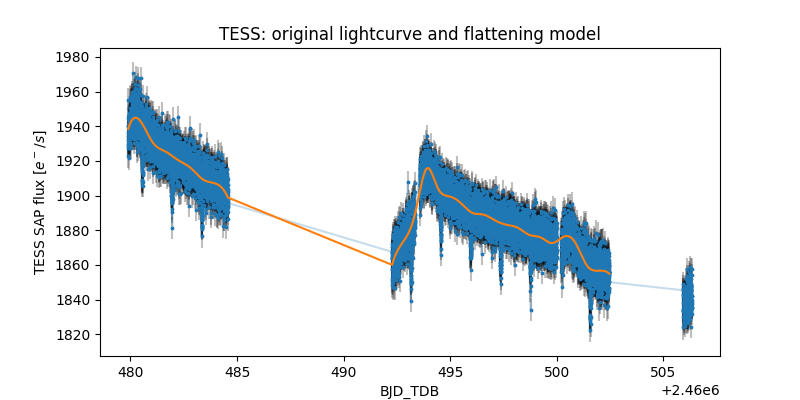

In [12]:
plt.figure(figsize=(8,4))
plt.title('TESS: original lightcurve and flattening model')
plt.scatter(time, sap_flux, c='C0', s=3)
plt.errorbar(time, sap_flux, yerr=sap_flux_error, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time, sap_flatten_model, c='C1', zorder=10)
plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.show()

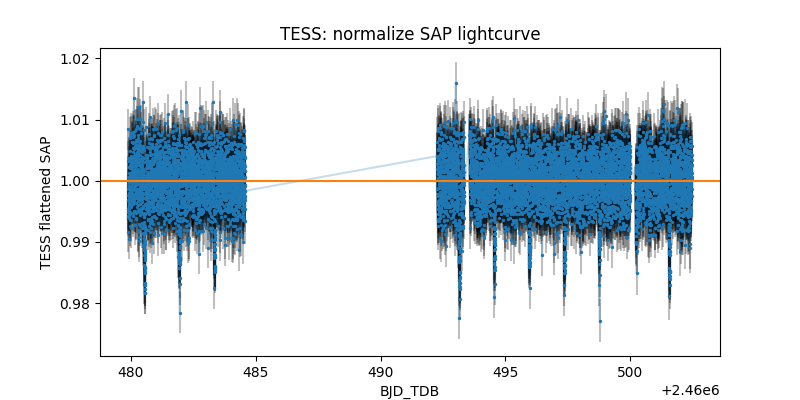

In [15]:
plt.figure(figsize=(8,4))
plt.title('TESS: normalize SAP lightcurve')
plt.scatter(time, sap_flatten_flux, c='C0', s=2)
plt.errorbar(time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.axhline(1, c='C1')
plt.xlabel('BJD_TDB')
plt.ylabel('TESS flattened SAP')
plt.show()

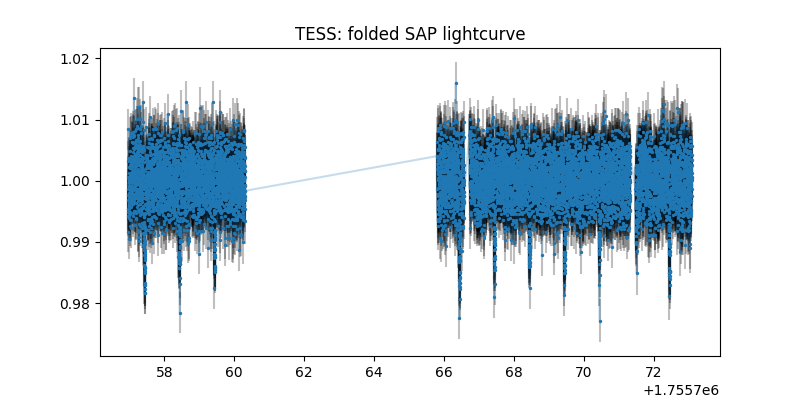

In [27]:
phase_folded_time = (time / period)  # <-- planetary period

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve')
plt.scatter(phase_folded_time, sap_flatten_flux, s=2)
plt.errorbar(phase_folded_time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.show()

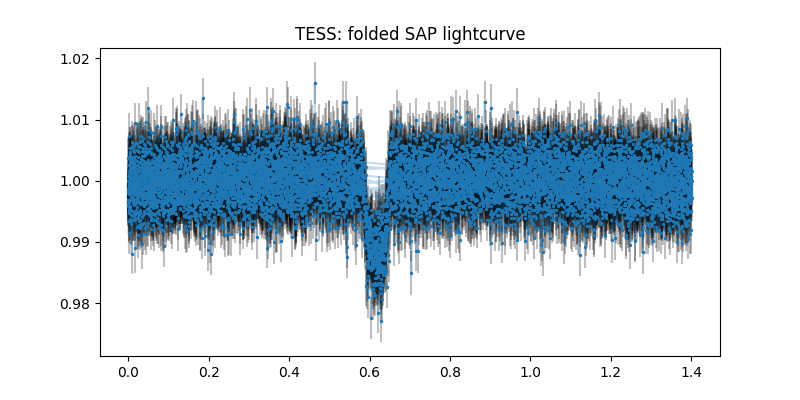

In [26]:
phase_folded_time = (time) %period  # <-- planetary period

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve')
plt.scatter(phase_folded_time, sap_flatten_flux, s=2)
plt.errorbar(phase_folded_time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.show()

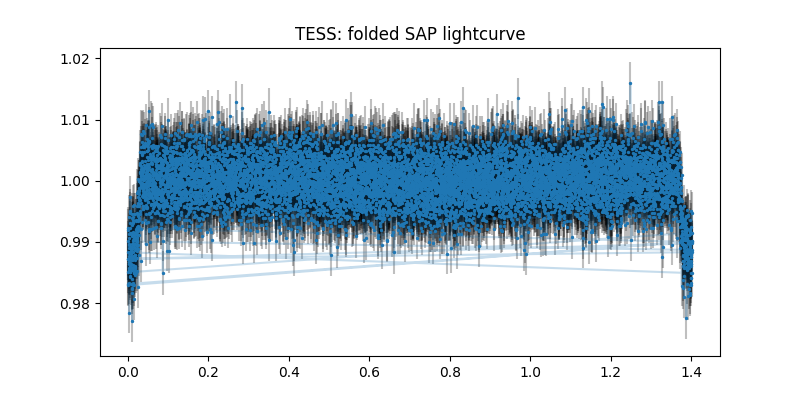

In [25]:
phase_folded_time = (time - transit_time) %period  # <-- planetary period

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve')
plt.scatter(phase_folded_time, sap_flatten_flux, s=2)
plt.errorbar(phase_folded_time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.show()

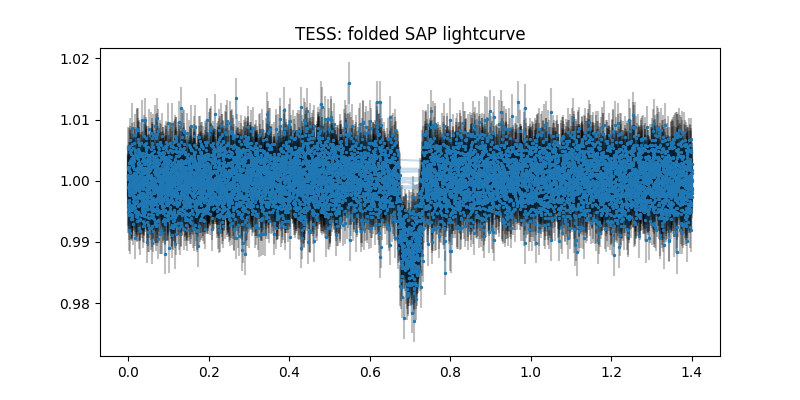

In [19]:
# Folding the lightcurves: overlapping the transits one on ech other
phase_folded_time = (time - transit_time - period/2) %period  # <-- planetary period

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve')
plt.scatter(phase_folded_time, sap_flatten_flux, s=2)
plt.errorbar(phase_folded_time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.show()

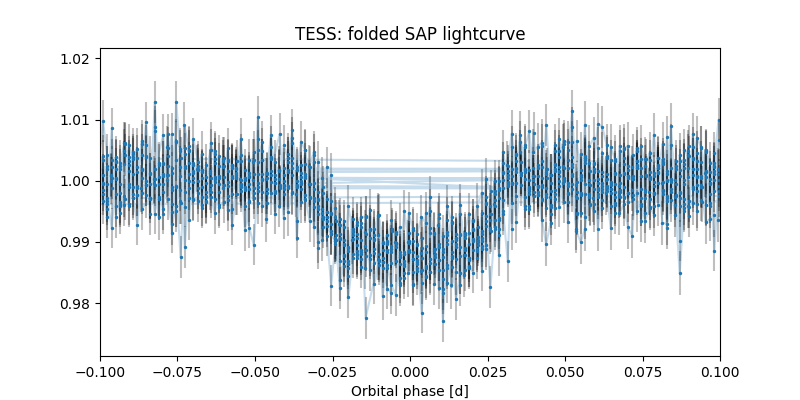

In [23]:
phase_folded_time = (time - transit_time - period/2) %period - period/2

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve')
plt.scatter(phase_folded_time, sap_flatten_flux, s=2)
plt.errorbar(phase_folded_time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.xlabel('Orbital phase [d]')
plt.xlim(-0.1, 0.1)
plt.show()

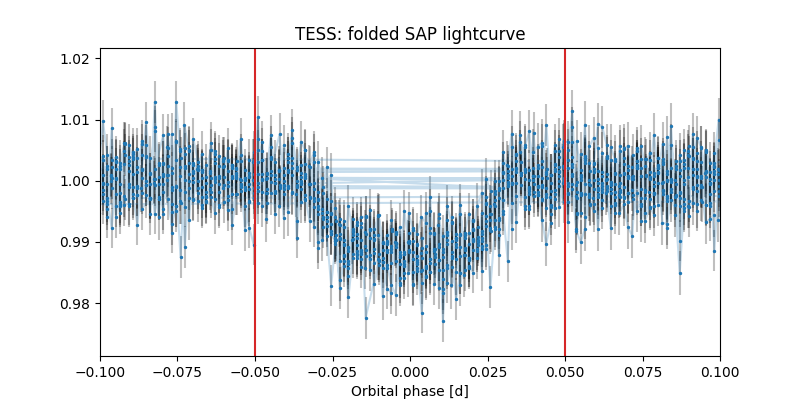

In [60]:
# period = 
transit_duration = 0.1

phase_folded_time = (time - transit_time - period/2) %period - period/2

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve')
plt.scatter(phase_folded_time, sap_flatten_flux, s=2)
plt.errorbar(phase_folded_time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.xlabel('Orbital phase [d]')
plt.axvline(transit_duration/2, c='C3')
plt.axvline(-transit_duration/2, c='C3')

plt.xlim(-0.1, 0.1)
plt.show()

In [61]:
from wotan import transit_mask

mask = transit_mask(time=time, period=period, duration=transit_duration, T0=transit_time)

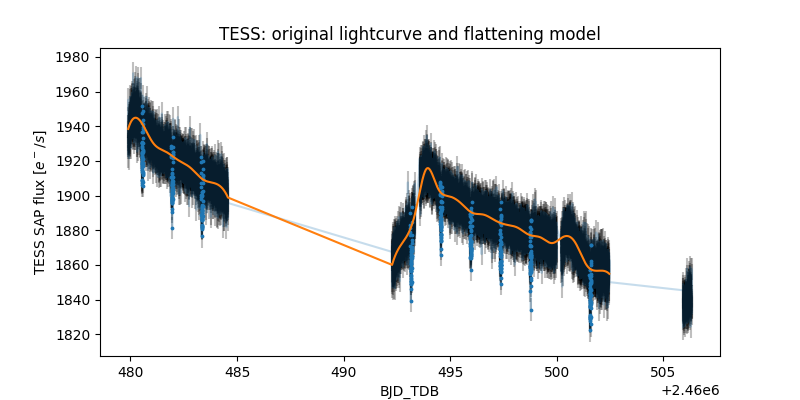

In [33]:
plt.figure(figsize=(8,4))
plt.title('TESS: original lightcurve and flattening model')
plt.scatter(time[mask], sap_flux[mask], c='C0', s=3)
plt.errorbar(time, sap_flux, yerr=sap_flux_error, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time, sap_flatten_model, c='C1', zorder=10)
plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.show()

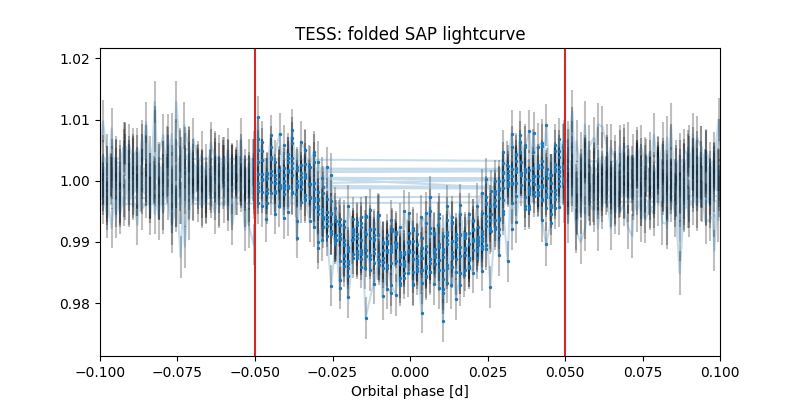

In [62]:
plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve')
plt.scatter(phase_folded_time[mask], sap_flatten_flux[mask], s=2)
plt.errorbar(phase_folded_time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.xlabel('Orbital phase [d]')
plt.axvline(transit_duration/2, c='C3')
plt.axvline(-transit_duration/2, c='C3')

plt.xlim(-0.1, 0.1)
plt.show()

In [43]:
sap_masked_flatten_flux, sap_masked_flatten_model = flatten(time, sap_flux, method='hspline',\
                                                            window_length=0.5, return_trend=True, mask=mask)

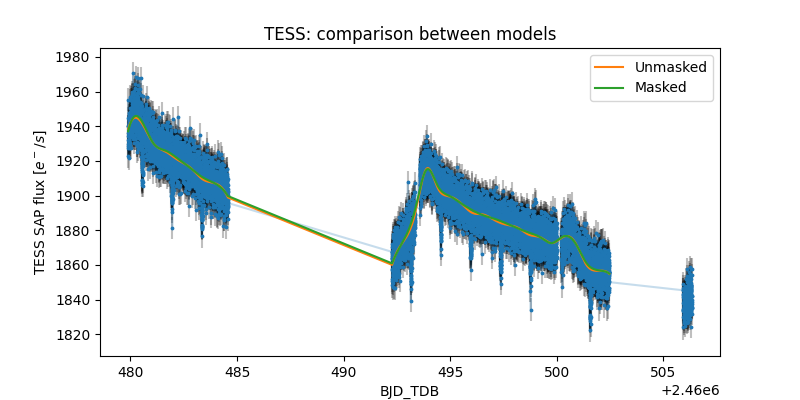

In [47]:
plt.figure(figsize=(8,4))
plt.title('TESS: comparison between models')
plt.scatter(time, sap_flux, c='C0', s=3)
plt.errorbar(time, sap_flux, yerr=sap_flux_error, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time, sap_flatten_model, c='C1', zorder=10, label='Unmasked')
plt.plot(time, sap_masked_flatten_model, c='C2', zorder=10, label='Masked')

plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.legend()
plt.show()

In [59]:
# How to compare different way to perform flattening
print('STD with mask  : {0:.6f}'.format(np.std(np.isfinite(sap_masked_flatten_flux[~mask]))))  # <-- np.isfinite per togliere i nan
print('STD with mask  : {0:.6f}'.format(np.std(np.isfinite(sap_flatten_flux[~mask]))))         # <-- STAI USANDO LO STESSO, LUI CI METTE IL BIWEIGHT METHOD, TU NON LO HAI FATTO
print('Median error flattened flux : {0:.6f}'.format(np.median(np.isfinite(sap_flux_error / sap_masked_flatten_model))))

STD with mask  : 0.167861
STD with mask  : 0.167861
Median error flattened flux : 1.000000


In [56]:
flatten_sector80_dictionary = {
    'time': time,
    'flatten_flux': sap_masked_flatten_flux,
    'flatten_flux_error': sap_flux_error / sap_masked_flatten_model
}

In [58]:
pickle.dump(flatten_sector80_dictionary, open('flatten_sector80_dictionary.p', 'wb'))